# TP numéro 2: Manipulation d'images

## chargement et affichage d'images ppm

afin de pouvoir manipuler plus facilement des images ppm, vous allez importer le module iiwHelper que je vous fournis avec le sujet. Pour ceci exécuter la cellule ci dessous

In [1]:
import cv2
from iiwHelper import *

In [2]:
img :ImagePPM = loadImage("./pict/EU_propre.ppm")

index: int = int(0)

while (index < len(img.pixels)):
    p: Pixel = img.pixels[index]
    v: int = int(0.2126 * p.r + 0.7152 * p.g + 0.0722 * p.b)
    p.r = v
    p.g = v
    p.b = v
    index = index + 1
    
saveImage(img,"./pict/EU_gray.ppm")

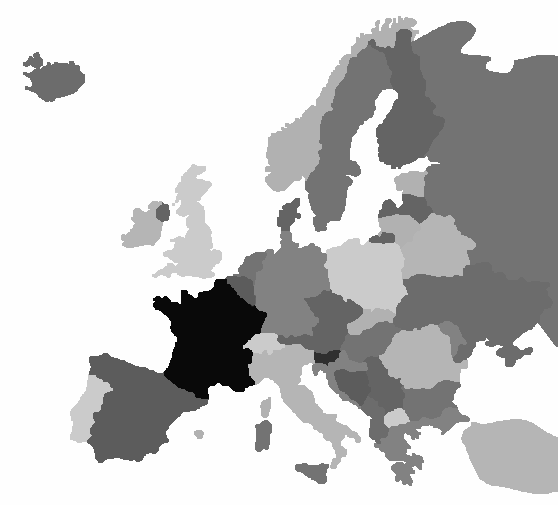

In [3]:
showImageFromPath("./pict/EU_gray.ppm")

## Éclaircissement bords d'image

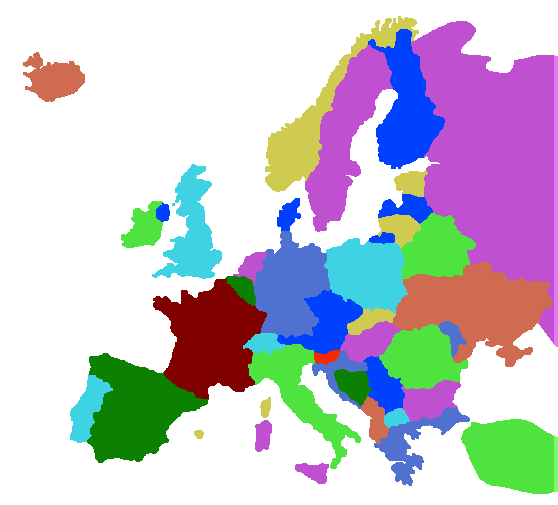

In [4]:
img :Image = loadImage("./pict/EU_propre.ppm")

pixelsToChange: list[Pixel] = []
index: int = int(0)
indexLastPix: int = len(img.pixels)-1

while (index < img.width):
    pixelsToChange = pixelsToChange + [img.pixels[index], img.pixels[index+img.width], img.pixels[index+2*img.width], img.pixels[index+3*img.width]]
    pixelsToChange = pixelsToChange + [img.pixels[indexLastPix-index], img.pixels[indexLastPix-(index+img.width)], img.pixels[indexLastPix-(index+2*img.width)], img.pixels[indexLastPix-(index+3*img.width)]]
    index = index + 1

index = 4

while (index < (img.height-4)):
    pixelsToChange = pixelsToChange + [img.pixels[index*img.width], img.pixels[index*img.width+1], img.pixels[index*img.width+2], img.pixels[index*img.width+3]]
    pixelsToChange = pixelsToChange + [img.pixels[index*img.width+(img.width-1)], img.pixels[index*img.width+(img.width-2)], img.pixels[index*img.width+(img.width-3)], img.pixels[index*img.width+(img.width-4)]]
    index = index + 1
    
index = 0    
while (index < len(pixelsToChange)):
    p: Pixel = pixelsToChange[index]
    if (p.r < 215):
        p.r = p.r + 40
    else:
        p.r = 255
    if (p.g < 215):
        p.g = p.g + 40
    else:
        p.g = 255
    if (p.b < 215):
        p.b = p.b + 40
    else:
        p.b = 255
    index = index + 1
    
saveImage(img,"./pict/modified/EU_propre.ppm")
showImageFromPath("./pict/modified/EU_propre.ppm")